In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt


In [3]:

picture_size = 48
datagen_train= ImageDataGenerator(
        rescale=1/255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split = 0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

datagen_test = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,)

train_set = datagen_train.flow_from_directory("train",
                                            target_size=(picture_size,picture_size),
                                            
                                             subset = 'training',
                                             batch_size=64,
                                            class_mode="categorical")

vad_set = datagen_train.flow_from_directory("train",
                                       target_size=(picture_size,picture_size),
                                       subset = 'validation',
                                       batch_size=64,
                                       class_mode="categorical")

Found 22933 images belonging to 7 classes.
Found 5729 images belonging to 7 classes.


In [4]:
x,y = train_set.next()

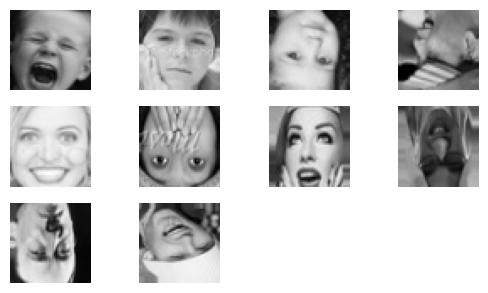

In [5]:
for i in range(10):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.xticks()
        plt.yticks([])
        plt.axis("off")

In [6]:
base_model = ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

for layer in base_model.layers[:-4]:
    layer.trainable=False
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

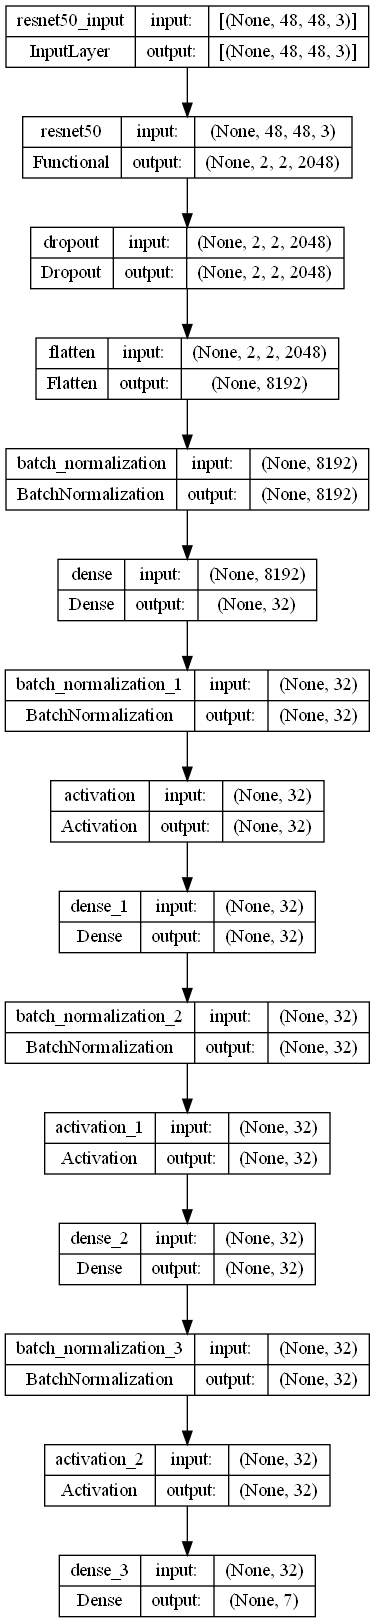

In [8]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [14]:
import tensorflow as tf
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')]


model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [15]:
history = model.fit(train_set, epochs=10,batch_size=64, 
                    validation_data=vad_set)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\gamer\AppData\Local\Temp\ipykernel_4216\2439073275.py", line 1, in <module>
      history = model.fit(train_set, epochs=10,batch_size=64,
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [64,7] and labels shape [448]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_52468]

In [11]:

test_set = datagen_test.flow_from_directory("test",
                                       target_size=(picture_size,picture_size),
                                       
                                       batch_size=64,
                                       class_mode="categorical")

Found 7171 images belonging to 7 classes.


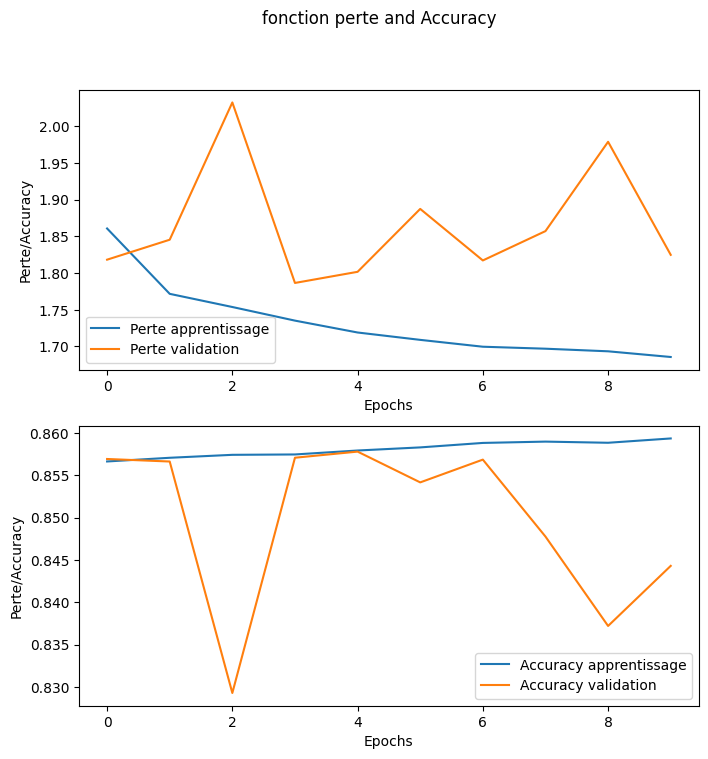

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 8))
plt.suptitle("fonction perte and Accuracy") 
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, 10), history.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte/Accuracy")
plt.legend() 
plt.subplot(2, 1, 2)
plt.plot(np.arange(0, 10), history.history["accuracy"], label="Accuracy apprentissage")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="Accuracy validation") 
plt.xlabel("Epochs") 
plt.ylabel("Perte/Accuracy")
plt.legend()


In [13]:
# Evaluate the model on the test data using `evaluate`
score = model.evaluate(test_set,verbose=0)
print(score[1:])

[0.8543538451194763, 0.4550706148147583, 0.09887044876813889, 0.700760006904602]


In [16]:
model.save('model_expression_2.h5')